### Suport Vector Machine

##### What is Suport Vector Machine

A Support Vector Machine (SVM) is a statistical method used to classify data by separating them with a hyperplane. The idea is to find a hyperplane in a multidimensional space that best separates the different classes of data. This hyperplane is then used to classify new data points, determining which side of the hyperplane they fall on and assigning them to the corresponding class.

SVM Formula:



**w:** is the weight vector, which determines the orientation of the hyperplane in the feature space. <br/>
**x:** represents a data point in the feature space.<br/>
**b:** is the bias term, which adjusts the position of the hyperplane to optimize the separation between the classes.

**Objective Function**<br/>

The objective of SVM is to find the hyperplane that maximizes the margin between the closest classes. The margin is defined as the distance between the hyperplane and the nearest point from each class, which should be as wide as possible. <br/>

The objective function that is minimized is: <br/>

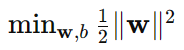 <br/>

This function aims to minimize the norm of the weight vector. **𝑤** which in turn maximizes the margin between the classes.

**Restrictions**

To ensure that all data points are correctly classified, each data point (𝑥𝑖,𝑦𝑖) must satisfy the following constraint:

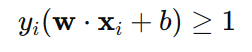

yi are the class labels, which are +1 or -1 depending on the class the point belongs to xi.

The constraint ensures that all positive points (+1) are on one side of the hyperplane and all negative points (-1) are on the other, with a minimum margin of 1 from the hyperplane.

**Kernel Trick**

To handle cases where the data is not linearly separable in the original space, SVM uses a technique known as a "kernel trick", which allows the data to be transformed to a higher dimensional space where it may be easier to find a linear hyperplane that separates them. properly: **K(xi, xj)**

The kernel **𝐾** is a function that computes the dot product between vectors in a higher-dimensional space, allowing SVM to classify complex data without needing to explicitly compute its coordinates in that space.

**Examples of hyperplane views**

Two-dimensional hyperplane

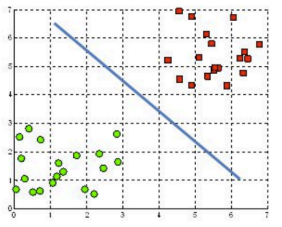

Three-dimensional hyperplane

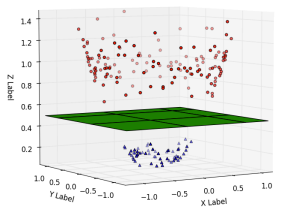






#### Implementation

In [119]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

In [120]:
# Generate data sample
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

In [121]:
# Create a model SVM with lineal kernel
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

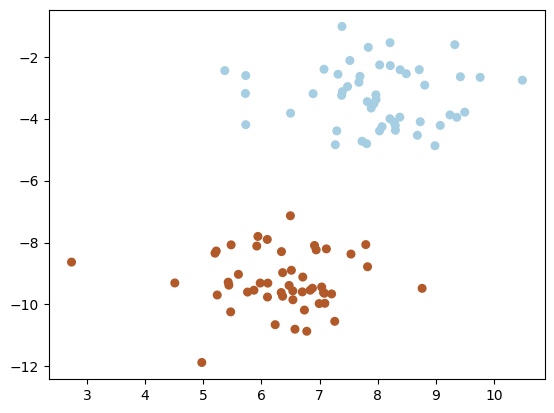

In [122]:
# Trace de points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

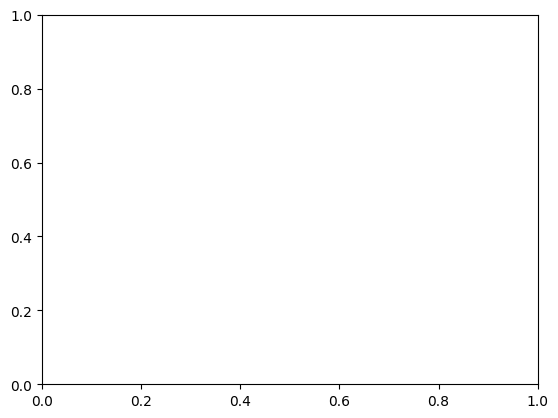

In [123]:
# Create grid to evaluate the model
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

In [124]:
# Draw decision boundaries and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

In [125]:
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
%matplotlib inline

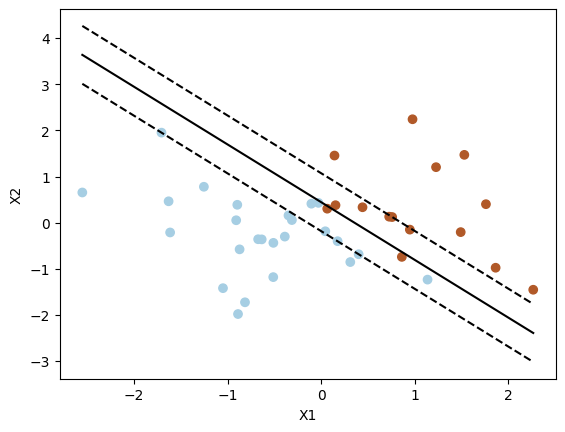

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generar datos de entrenamiento
np.random.seed(0)
X = np.random.randn(40, 2)
y = np.where((X[:, 0] + X[:, 1] > 0) & (X[:, 0] > 0), 1, -1)

# Crear el clasificador SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Graficar los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

# Dibujar el hiperplano separador
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - clf.intercept_[0] / w[1]

plt.plot(xx, yy, 'k-')

# Dibujar los márgenes
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.show()